Veri analiz sürecinde bize yardımcı olacak kütüphanelerimizi import ederek işe başlayalım.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as mno

from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score, roc_curve, recall_score, f1_score, precision_score

from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px

from sklearn import preprocessing

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/tabletpc-priceclassification/tablet.csv


Kütüphanelerimizi import ettik. Şimdi de kullanıcağımız veri çerçevesini ekleyelim.

In [2]:
dfMain=pd.read_csv("../input/tabletpc-priceclassification/tablet.csv")
df=dfMain.copy()

İlk 5 gözlemi inceleyelim.

In [3]:
df.head()

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru,3G,Dokunmatik,WiFi,FiyatAraligi,Renk
0,1325,Yok,1.9,Yok,2.0,Yok,50,0.1,146,1,10,499,695,2328.0,2,Var,Yok,Yok,Normal,Beyaz
1,1046,Var,2.8,Var,0.0,Var,58,0.2,100,8,0,259,1040,3863.0,9,Var,Var,Var,Pahalı,Pembe
2,843,Yok,1.3,Var,1.0,Yok,16,0.9,119,7,4,593,732,1734.0,14,Yok,Yok,Var,Ucuz,Mor
3,894,Yok,0.5,Var,1.0,Var,50,0.5,199,3,14,1285,1462,3615.0,6,Var,Yok,Var,Pahalı,Turuncu
4,936,Yok,1.0,Yok,1.0,Yok,18,0.2,153,3,18,1330,1686,2391.0,3,Var,Var,Var,Normal,Beyaz


Son 5 gözlemi inceleyelim.

In [4]:
df.tail()

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru,3G,Dokunmatik,WiFi,FiyatAraligi,Renk
1995,689,Yok,2.9,Var,3.0,Var,7,0.8,147,2,6,487,722,1241.0,16,Var,Yok,Yok,Çok Ucuz,Siyah
1996,1654,Yok,1.8,Yok,1.0,Yok,11,0.3,146,7,2,1184,1719,1070.0,14,Var,Var,Var,Ucuz,Sarı
1997,742,Yok,2.2,Var,4.0,Yok,56,0.2,190,7,14,577,1359,3557.0,12,Yok,Var,Var,Pahalı,Turuncu
1998,704,Yok,2.2,Var,4.0,Yok,53,0.2,186,6,6,251,1013,3653.0,15,Var,Var,Var,Normal,Turkuaz
1999,1872,Yok,0.5,Yok,5.0,Var,26,0.5,172,4,10,672,1088,2273.0,8,Var,Yok,Var,Normal,Siyah


Rastgele olacak şekilde 5 gözlemi inceleyelim.

In [5]:
df.sample(5)

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru,3G,Dokunmatik,WiFi,FiyatAraligi,Renk
1483,531,Yok,1.1,Yok,10.0,Yok,63,0.7,189,7,14,145,1903,2958.0,19,Yok,Var,Yok,Normal,Yeşil
1236,687,Var,1.3,Yok,9.0,Var,50,0.6,151,4,20,584,1151,3416.0,8,Var,Var,Yok,Pahalı,Sarı
1963,1948,Yok,2.8,Var,5.0,Var,18,0.2,135,2,14,477,571,816.0,3,Var,Yok,Yok,Çok Ucuz,Kırmızı
898,1583,Var,2.1,Var,11.0,Yok,14,0.7,148,7,16,942,1651,1704.0,2,Var,Yok,Var,Normal,Yeşil
672,630,Yok,2.0,Yok,9.0,Var,14,0.5,180,8,13,66,1448,1212.0,12,Var,Yok,Yok,Çok Ucuz,Mor


Veri setinin değişken ve gözlem sayısını öğrenelim

In [6]:
df.shape

(2000, 20)

Özniteliklerimizi inceleyelim.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   BataryaGucu          2000 non-null   int64  
 1   Bluetooth            2000 non-null   object 
 2   MikroislemciHizi     2000 non-null   float64
 3   CiftHat              2000 non-null   object 
 4   OnKameraMP           1995 non-null   float64
 5   4G                   2000 non-null   object 
 6   DahiliBellek         2000 non-null   int64  
 7   Kalinlik             2000 non-null   float64
 8   Agirlik              2000 non-null   int64  
 9   CekirdekSayisi       2000 non-null   int64  
 10  ArkaKameraMP         2000 non-null   int64  
 11  CozunurlukYükseklik  2000 non-null   int64  
 12  CozunurlukGenislik   2000 non-null   int64  
 13  RAM                  1988 non-null   float64
 14  BataryaOmru          2000 non-null   int64  
 15  3G                   2000 non-null   o

Eksik değer olup olmadığına bakalım.

In [8]:
df.isna().sum()

BataryaGucu             0
Bluetooth               0
MikroislemciHizi        0
CiftHat                 0
OnKameraMP              5
4G                      0
DahiliBellek            0
Kalinlik                0
Agirlik                 0
CekirdekSayisi          0
ArkaKameraMP            0
CozunurlukYükseklik     0
CozunurlukGenislik      0
RAM                    12
BataryaOmru             0
3G                      0
Dokunmatik              0
WiFi                    0
FiyatAraligi            0
Renk                    0
dtype: int64

'OnKameraMP' ve 'RAM' özniteliklerinde eksik veri olduğunu söyleyebilriz.

Sayısal değişkenlerin istatistik bilgilerini inceleyelim.

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BataryaGucu,2000.0,1238.518500,439.418206,501.0,851.75,1226.0,1615.25,1998.0
MikroislemciHizi,2000.0,1.522250,0.816004,0.5,0.70,1.5,2.20,3.0
OnKameraMP,1995.0,4.312281,4.342095,0.0,1.00,3.0,7.00,19.0
DahiliBellek,2000.0,32.046500,18.145715,2.0,16.00,32.0,48.00,64.0
Kalinlik,2000.0,0.501750,0.288416,0.1,0.20,0.5,0.80,1.0
Agirlik,2000.0,140.249000,35.399655,80.0,109.00,141.0,170.00,200.0
CekirdekSayisi,2000.0,4.520500,2.287837,1.0,3.00,4.0,7.00,8.0
ArkaKameraMP,2000.0,9.916500,6.064315,0.0,5.00,10.0,15.00,20.0
CozunurlukYükseklik,2000.0,645.108000,443.780811,0.0,282.75,564.0,947.25,1960.0
CozunurlukGenislik,2000.0,1251.515500,432.199447,500.0,874.75,1247.0,1633.00,1998.0


İstatistikleri inceleyip yorumlarda bulunalım.

* Ram Özniteliğinin standart sapmasının oldukça yüksek olduğunu, gözlemlerde ram'in fazla değişkenlik gösterdiğini söyleyebiliriz.

* Ram ve OnKameraMP özniteliklerinde eksik gözlem olduğunu söyleyebiliriz.

* OnKameraMP ve ArkaKameraMP özniteliklerinin bazı gözlemlerinde 0 olduğunu, bu gözlemlerde On Kamera ya da Arka Kamera bulunmadığını söyleyebiliriz.

Eksik verilerimizi düzenlemeye başlamadan önce missingno kütüphanesini kullanarak aralarındaki ilişkiyi inceleyelim.

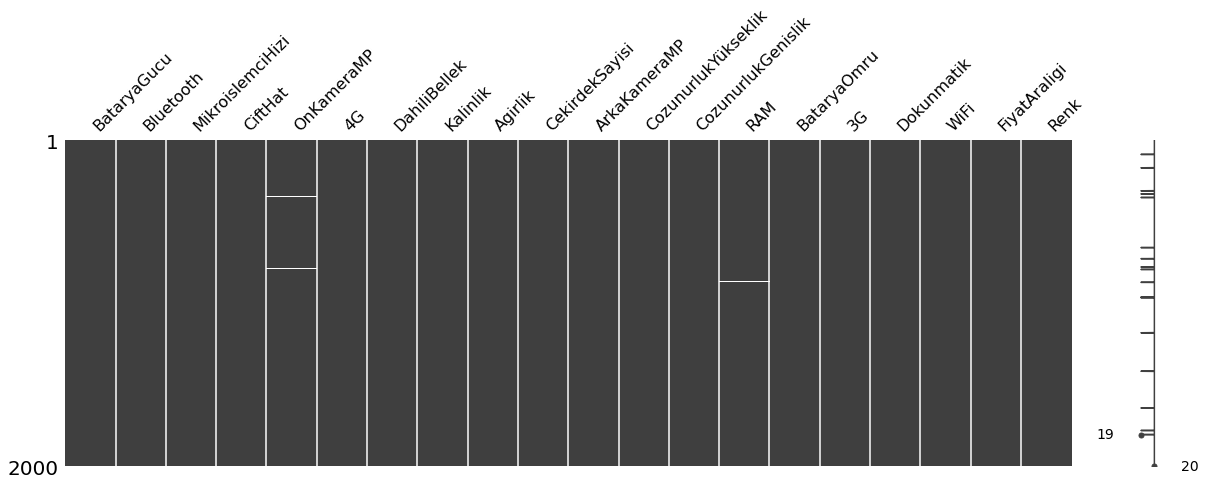

In [10]:
mno.matrix(df, figsize = (20, 6))
plt.show()

Eksik verileri doldurmak için aynı klasmandaki ürünlerin özelleiklerine bakalım.

In [11]:
BosDegerler = df[df.isna().any(axis=1)]
BosDegerler

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru,3G,Dokunmatik,WiFi,FiyatAraligi,Renk
87,1062,Var,2.5,Var,6.0,Yok,10,0.9,160,1,13,1596,1807,NaN,16,Yok,Yok,Var,Pahalı,Gri
169,1944,Var,1.8,Var,0.0,Var,31,0.8,87,4,10,1111,1362,NaN,8,Var,Yok,Yok,Pahalı,Beyaz
310,1479,Var,1.8,Var,0.0,Var,24,0.1,146,6,0,327,645,NaN,5,Var,Yok,Yok,Pahalı,Turuncu
329,1035,Yok,0.6,Var,2.0,Var,44,0.5,99,3,3,236,1960,NaN,12,Var,Var,Yok,Pahalı,Beyaz
351,726,Yok,2.2,Yok,NaN,Var,40,0.8,94,4,20,323,978,1342.0,4,Var,Var,Var,Çok Ucuz,Beyaz
658,732,Var,1.3,Yok,5.0,Var,32,0.4,163,8,7,1661,1836,NaN,5,Var,Yok,Var,Pahalı,Siyah
726,1296,Yok,0.9,Var,NaN,Var,14,0.5,124,5,3,811,1272,490.0,4,Var,Var,Var,Çok Ucuz,Sarı
777,753,Var,0.5,Yok,11.0,Var,48,0.1,121,8,20,606,1316,NaN,16,Var,Yok,Yok,Pahalı,Turkuaz
792,504,Yok,2.8,Var,NaN,Yok,40,0.5,178,3,0,626,1195,470.0,16,Var,Yok,Yok,Çok Ucuz,Siyah
871,1035,Var,2.7,Yok,1.0,Yok,40,0.2,157,5,15,757,1912,NaN,5,Yok,Var,Var,Pahalı,Turuncu


Eksik verileri doldurmak için ilişkilerini incelemek için ısı harisatını oluşturalım.

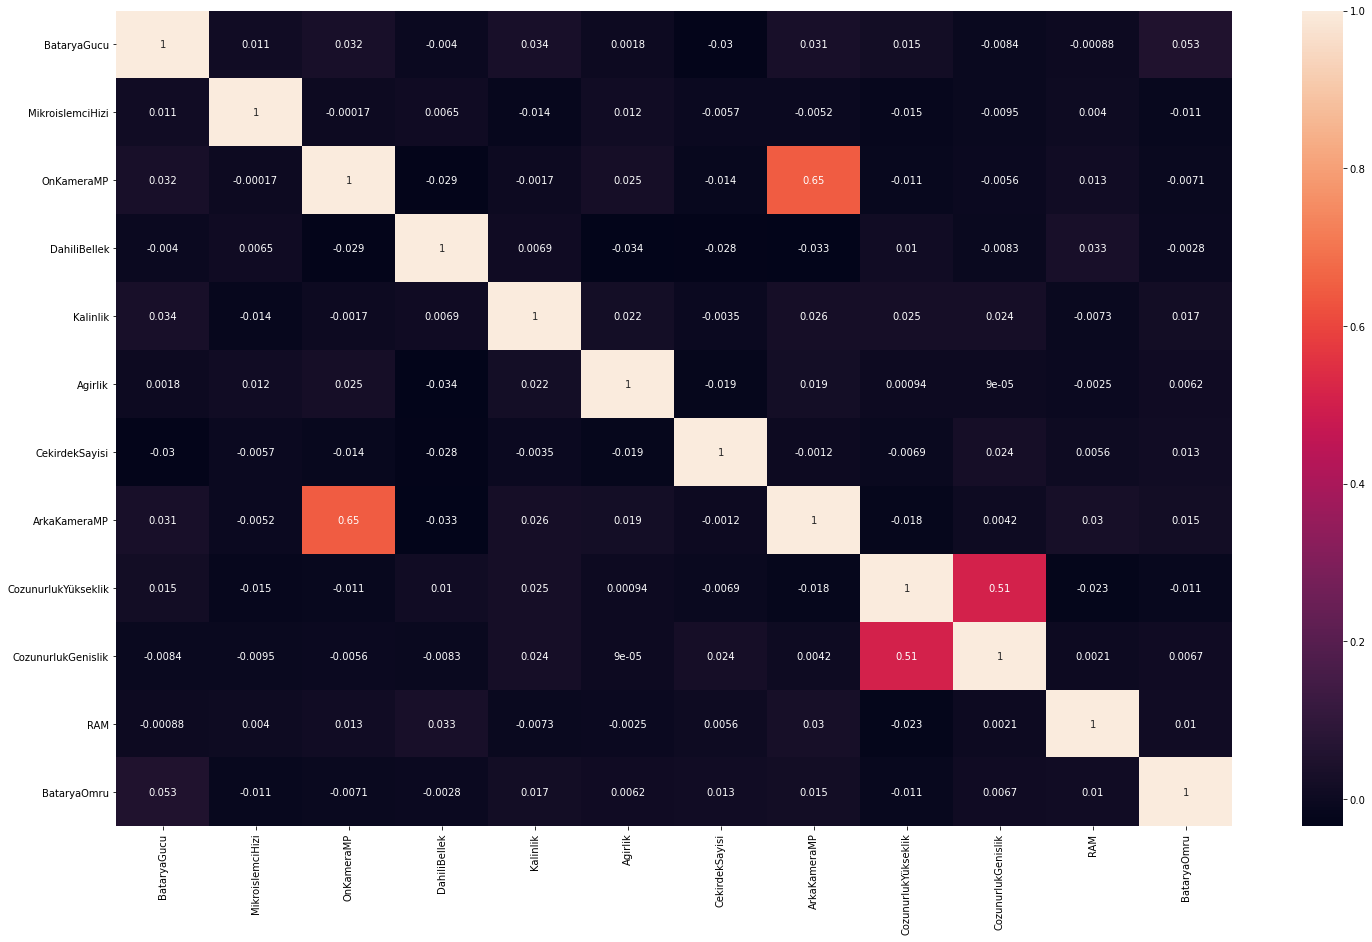

In [12]:
corr = df.corr()
f,ax=plt.subplots(figsize=(25,15))
sns.heatmap(corr, annot=True, ax=ax)
plt.show()

Isı haritasını incelediğimizde ön kamera va arka kamera değerleri arasında güçlü ve pozitif bir ilişki olduğunu görebiliriz.

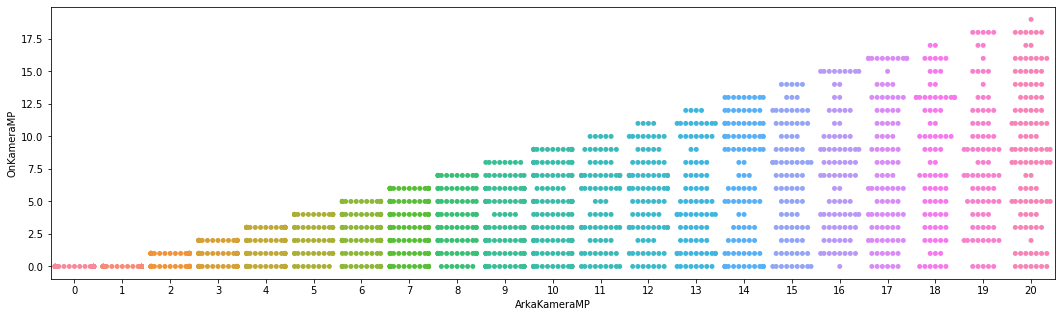

In [13]:
plt.figure(figsize=(18,5))
ax = sns.swarmplot(x="ArkaKameraMP", y="OnKameraMP", data=df)


In [14]:
data1=go.Violin(y=df.OnKameraMP,x=df.FiyatAraligi, box_visible=True, line_color='black',
                               meanline_visible=True, fillcolor='lightseagreen', opacity=0.6,
                               x0='Ön Kamera')
layout=dict(title='Ön Kamera İstatistikleri',
           xaxis=dict(title='Fiyat Aralığı',ticklen=5,zeroline=False)
           )
fig = go.Figure(data=data1,layout=layout)
iplot(fig)

Görüldüğü üzere fiyat aralığıyla OnKameraMP özniteliğinin bir ilişkisi bulunmamaktadır.

OnKameraMP özniteliğindeki boş gözlemleri, bulunduğu noktadaki ArkaKameraMP değerinden yola çıkarak dolduralım.

In [15]:
df[df.OnKameraMP.isna()==True]

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru,3G,Dokunmatik,WiFi,FiyatAraligi,Renk
351,726,Yok,2.2,Yok,NaN,Var,40,0.8,94,4,20,323,978,1342.0,4,Var,Var,Var,Çok Ucuz,Beyaz
726,1296,Yok,0.9,Var,NaN,Var,14,0.5,124,5,3,811,1272,490.0,4,Var,Var,Var,Çok Ucuz,Sarı
792,504,Yok,2.8,Var,NaN,Yok,40,0.5,178,3,0,626,1195,470.0,16,Var,Yok,Yok,Çok Ucuz,Siyah
1416,1617,Var,2.4,Yok,NaN,Var,36,0.8,85,1,9,743,1426,296.0,7,Var,Yok,Yok,Çok Ucuz,Sarı
1641,763,Yok,1.7,Var,NaN,Var,2,0.5,92,8,14,1028,1186,1050.0,8,Var,Var,Yok,Çok Ucuz,Siyah


In [16]:
ArkaKameraDegerleri=list(df[df.OnKameraMP.isna()==True].ArkaKameraMP)
ArkaKameraDegerleri

[20, 3, 0, 9, 14]

In [17]:
for each in ArkaKameraDegerleri:
    
    OnKameraDegeri = (df[df.ArkaKameraMP==each].OnKameraMP).median()
    
    df.loc[(df['ArkaKameraMP'] == each)&(df.OnKameraMP.isna()), 'OnKameraMP'] = OnKameraDegeri

In [18]:
df.isna().sum()

BataryaGucu             0
Bluetooth               0
MikroislemciHizi        0
CiftHat                 0
OnKameraMP              0
4G                      0
DahiliBellek            0
Kalinlik                0
Agirlik                 0
CekirdekSayisi          0
ArkaKameraMP            0
CozunurlukYükseklik     0
CozunurlukGenislik      0
RAM                    12
BataryaOmru             0
3G                      0
Dokunmatik              0
WiFi                    0
FiyatAraligi            0
Renk                    0
dtype: int64

RAM özniteliğini doldurmak için ilk olarak fiyat aralığına göre değişimini inceleyelim.

In [19]:
data2=go.Violin(y=df.RAM,x=df.FiyatAraligi, box_visible=True, line_color='black',
                               meanline_visible=True, fillcolor='lightseagreen', opacity=0.6,
                               x0='Total Bill')
layout=dict(title='RAM İstatistikleri',
           xaxis=dict(title='Fiyat Aralığı',ticklen=5,zeroline=False)
           )
fig = go.Figure(data=data2,layout=layout)
iplot(fig)

RAM özniteliğini doldururken fiyat aralığındaki benzerlerini inceleyerek doldurabiliriz.

In [20]:
df[df.RAM.isna()==True].FiyatAraligi.unique()

array(['Pahalı'], dtype=object)

Görüldüğü üzere eksik verilerimizin hepsi pahalı kategorisindedir. Eksik verileri bu kategorideki diğer gözlemlerin medyanıyla dolduralım.

In [21]:
df[df.RAM.isna()==True]

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru,3G,Dokunmatik,WiFi,FiyatAraligi,Renk
87,1062,Var,2.5,Var,6.0,Yok,10,0.9,160,1,13,1596,1807,NaN,16,Yok,Yok,Var,Pahalı,Gri
169,1944,Var,1.8,Var,0.0,Var,31,0.8,87,4,10,1111,1362,NaN,8,Var,Yok,Yok,Pahalı,Beyaz
310,1479,Var,1.8,Var,0.0,Var,24,0.1,146,6,0,327,645,NaN,5,Var,Yok,Yok,Pahalı,Turuncu
329,1035,Yok,0.6,Var,2.0,Var,44,0.5,99,3,3,236,1960,NaN,12,Var,Var,Yok,Pahalı,Beyaz
658,732,Var,1.3,Yok,5.0,Var,32,0.4,163,8,7,1661,1836,NaN,5,Var,Yok,Var,Pahalı,Siyah
777,753,Var,0.5,Yok,11.0,Var,48,0.1,121,8,20,606,1316,NaN,16,Var,Yok,Yok,Pahalı,Turkuaz
871,1035,Var,2.7,Yok,1.0,Yok,40,0.2,157,5,15,757,1912,NaN,5,Yok,Var,Var,Pahalı,Turuncu
961,1949,Yok,1.3,Var,0.0,Yok,23,0.1,101,5,1,839,1136,NaN,20,Var,Yok,Yok,Pahalı,Sarı
965,1786,Yok,1.2,Yok,11.0,Yok,61,0.1,123,3,14,74,865,NaN,17,Yok,Var,Yok,Pahalı,Kahverengi
1180,1369,Var,1.8,Var,6.0,Yok,34,0.5,162,1,7,553,727,NaN,18,Yok,Var,Var,Pahalı,Turuncu


In [22]:
df.RAM.fillna(round(df[df.FiyatAraligi=="Pahalı"].RAM.median()),inplace=True)

Eksik verilerimizi doldurduk.

In [23]:
df.isna().sum()

BataryaGucu            0
Bluetooth              0
MikroislemciHizi       0
CiftHat                0
OnKameraMP             0
4G                     0
DahiliBellek           0
Kalinlik               0
Agirlik                0
CekirdekSayisi         0
ArkaKameraMP           0
CozunurlukYükseklik    0
CozunurlukGenislik     0
RAM                    0
BataryaOmru            0
3G                     0
Dokunmatik             0
WiFi                   0
FiyatAraligi           0
Renk                   0
dtype: int64

Var-Yok olarak yazılmış verilerimizi binary formatına dönüştürelim.

In [24]:
df.replace("Yok",0,inplace=True)
df.replace("Var",1,inplace=True)

In [25]:
df.head()

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru,3G,Dokunmatik,WiFi,FiyatAraligi,Renk
0,1325,0,1.9,0,2.0,0,50,0.1,146,1,10,499,695,2328.0,2,1,0,0,Normal,Beyaz
1,1046,1,2.8,1,0.0,1,58,0.2,100,8,0,259,1040,3863.0,9,1,1,1,Pahalı,Pembe
2,843,0,1.3,1,1.0,0,16,0.9,119,7,4,593,732,1734.0,14,0,0,1,Ucuz,Mor
3,894,0,0.5,1,1.0,1,50,0.5,199,3,14,1285,1462,3615.0,6,1,0,1,Pahalı,Turuncu
4,936,0,1.0,0,1.0,0,18,0.2,153,3,18,1330,1686,2391.0,3,1,1,1,Normal,Beyaz


Renk özniteliğinin Fiyat Aralığı üzerindeki etkisini inceleyelim.

In [26]:
trace1=go.Bar(
    x=df[df.FiyatAraligi=="Çok Ucuz"].Renk.value_counts().index,
    y=df[df.FiyatAraligi=="Çok Ucuz"].Renk.value_counts().values,
    name="Çok Ucuz",
    marker=dict(color="rgba(51, 102, 255,0.5)",
               line=dict(color="rgba(0,0,0)",width=1.5)
               ),
    )

trace2=go.Bar(
    x=df[df.FiyatAraligi=="Ucuz"].Renk.value_counts().index,
    y=df[df.FiyatAraligi=="Ucuz"].Renk.value_counts().values,
    name="Ucuz",
    marker=dict(color="rgba(0, 204, 102,0.5)",
               line=dict(color="rgba(0,0,0)",width=1.5)
               ),
    )

trace3=go.Bar(
    x=df[df.FiyatAraligi=="Normal"].Renk.value_counts().index,
    y=df[df.FiyatAraligi=="Normal"].Renk.value_counts().values,
    name="Normal",
    marker=dict(color="rgba(255, 255, 77,0.5)",
               line=dict(color="rgba(0,0,0)",width=1.5)
               ),
    )

trace4=go.Bar(
    x=df[df.FiyatAraligi=="Pahalı"].Renk.value_counts().index,
    y=df[df.FiyatAraligi=="Pahalı"].Renk.value_counts().values,
    name="Pahalı",
    marker=dict(color="rgba(255, 102, 153,0.5)",
               line=dict(color="rgba(0,0,0)",width=1.5)
               ),
    )


data=[trace1,trace2,trace3,trace4]
layout= go.Layout(barmode="group")

fig=go.Figure(data=data,layout=layout)
iplot(fig)

Grafiği incelediğimizde 'Renk' özniteliğimizin Fiyat Aralığı üzerinde bir etkisi olmadığını görebiliriz. 'Renk' özniteliğini binary olarak yazıp öznitelik sayısını arttırmaktansa 'Renk' özniteliğini silmek daha yararlı olacaktır.

In [27]:
df.drop(['Renk'], axis=1,inplace=True)
df.head()

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru,3G,Dokunmatik,WiFi,FiyatAraligi
0,1325,0,1.9,0,2.0,0,50,0.1,146,1,10,499,695,2328.0,2,1,0,0,Normal
1,1046,1,2.8,1,0.0,1,58,0.2,100,8,0,259,1040,3863.0,9,1,1,1,Pahalı
2,843,0,1.3,1,1.0,0,16,0.9,119,7,4,593,732,1734.0,14,0,0,1,Ucuz
3,894,0,0.5,1,1.0,1,50,0.5,199,3,14,1285,1462,3615.0,6,1,0,1,Pahalı
4,936,0,1.0,0,1.0,0,18,0.2,153,3,18,1330,1686,2391.0,3,1,1,1,Normal


Veri setimizi hazırladık.

Veri setimizin korelasyon ısı haritasını çıkartarak yorumlayalım. Fiyat Aralığına diğer özniteliklerin etkisini incelemek için Fiyat Aralığını sayısal olarak gösterelim

In [28]:
dfMain=df.copy()
dfMain.replace("Çok Ucuz",0,inplace=True)
dfMain.replace("Ucuz",1,inplace=True)
dfMain.replace("Normal",2,inplace=True)
dfMain.replace("Pahalı",3,inplace=True)

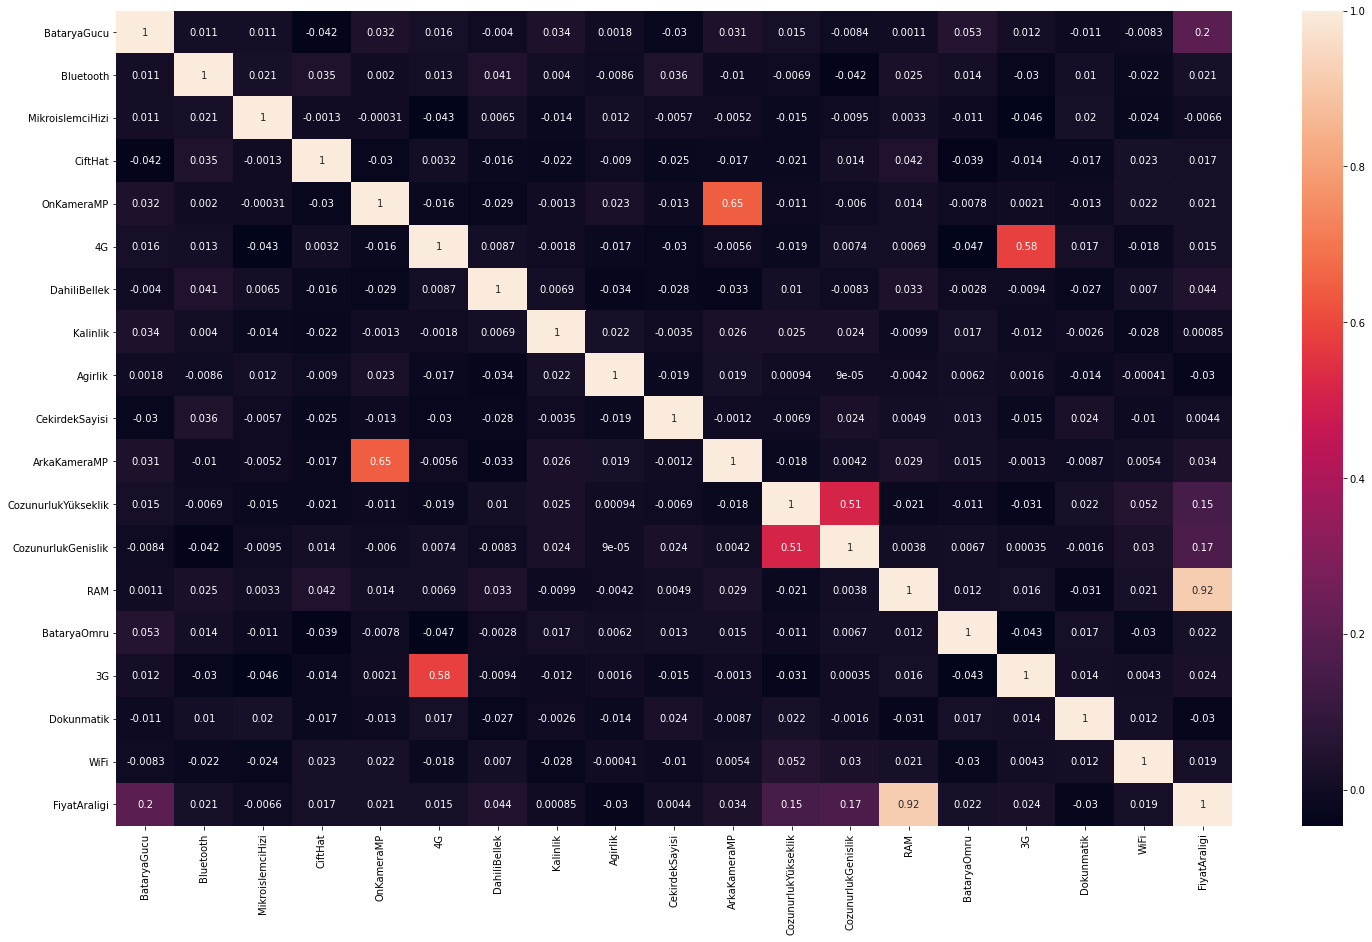

In [29]:
corr = dfMain.corr()
f,ax=plt.subplots(figsize=(25,15))
sns.heatmap(corr, annot=True, ax=ax)
plt.show()

* Isı haritasını incelersek Fiyat aralığı ile RAM arasında pozitif ve güçlü bir ilişki olduğunu söyleyebiliriz. RAM arttıkça Fiyat aralığı da artıyordur. Bunun sebebi RAM donanım parçasının maliyetli olmasından kaynaklı olabilir. Çözünürlük yüksekliği, Çözünürlük genişliği ve Batarya gücünün de Fiyat aralığı üzerinde çok güçlü olmasa da pozitif bir ilişkisi olduğunu söyleyebiliriz

* Aynı şekilde 4G - 3G , OnKameraMP - ArkaKameraMP , ÇözünürlükGenislik - ÇözünürlükKalınlık ikilileri arasında da güçlü ve pozitif bir ilişki vardır. Bu ilişkilerin nedeni daha çok benzer öznitelikler olmasından kaynaklıdır.

Bu ilişkileri görsellşetirerek daha iyi inceleyelim;

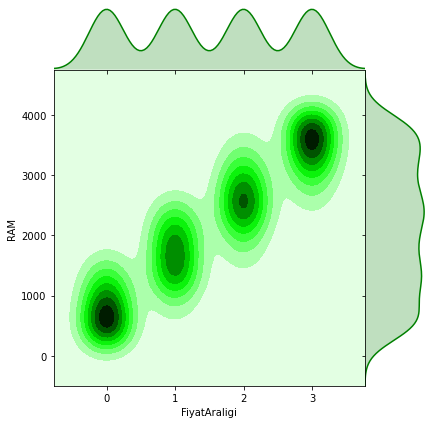

In [30]:
sns.jointplot("FiyatAraligi", "RAM", data=dfMain,
                  kind="kde", space=0, color="g")
plt.show()

In [31]:
fiyatAraliklari=[0,1,2,3]
ramOrtalamasi=[dfMain[dfMain.FiyatAraligi==0].RAM.mean(),dfMain[dfMain.FiyatAraligi==1].RAM.mean(),dfMain[dfMain.FiyatAraligi==2].RAM.mean(),dfMain[dfMain.FiyatAraligi==3].RAM.mean()]
fig = px.bar( x=fiyatAraliklari, y=ramOrtalamasi, height=400, color=ramOrtalamasi)
fig.show()

In [32]:
liste=[]
for i in range(2000):
    liste.append(i)
data=[
    {
        "y":dfMain.RAM,
        "x":liste,
        "mode":"markers",
        "marker":{
            "color":dfMain.FiyatAraligi,
            "showscale":True
        },
        "text":dfMain.FiyatAraligi
    }
]
iplot(data)

Tahmin ettiğimiz gibi RAM arttıkça Fiyat aralığı da artmıştır. Aralarında güçlü ve pozitif bir ilişki vardır

In [33]:
dfMain.head()

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru,3G,Dokunmatik,WiFi,FiyatAraligi
0,1325,0,1.9,0,2.0,0,50,0.1,146,1,10,499,695,2328.0,2,1,0,0,2
1,1046,1,2.8,1,0.0,1,58,0.2,100,8,0,259,1040,3863.0,9,1,1,1,3
2,843,0,1.3,1,1.0,0,16,0.9,119,7,4,593,732,1734.0,14,0,0,1,1
3,894,0,0.5,1,1.0,1,50,0.5,199,3,14,1285,1462,3615.0,6,1,0,1,3
4,936,0,1.0,0,1.0,0,18,0.2,153,3,18,1330,1686,2391.0,3,1,1,1,2


In [34]:
batayaGucuOrtalamasi=[dfMain[dfMain.FiyatAraligi==0].BataryaGucu.mean(),dfMain[dfMain.FiyatAraligi==1].BataryaGucu.mean(),dfMain[dfMain.FiyatAraligi==2].BataryaGucu.mean(),dfMain[dfMain.FiyatAraligi==3].BataryaGucu.mean()]
fig = px.bar( x=fiyatAraliklari, y=batayaGucuOrtalamasi, height=400, color=batayaGucuOrtalamasi)
fig.show()

In [35]:
cozunurlukYukseklikOrtalamasi=[dfMain[dfMain.FiyatAraligi==0].CozunurlukYükseklik.mean(),dfMain[dfMain.FiyatAraligi==1].CozunurlukYükseklik.mean(),dfMain[dfMain.FiyatAraligi==2].CozunurlukYükseklik.mean(),dfMain[dfMain.FiyatAraligi==3].CozunurlukYükseklik.mean()]
fig = px.bar( x=fiyatAraliklari, y=cozunurlukYukseklikOrtalamasi, height=400, color=cozunurlukYukseklikOrtalamasi)
fig.show()

In [36]:
cozunurlukGenislikOrtalamasi=[dfMain[dfMain.FiyatAraligi==0].CozunurlukYükseklik.mean(),dfMain[dfMain.FiyatAraligi==1].CozunurlukYükseklik.mean(),dfMain[dfMain.FiyatAraligi==2].CozunurlukYükseklik.mean(),dfMain[dfMain.FiyatAraligi==3].CozunurlukYükseklik.mean()]
fig = px.bar( x=fiyatAraliklari, y=cozunurlukGenislikOrtalamasi, height=400, color=cozunurlukGenislikOrtalamasi)
fig.show()

Görülüdüğü gibi Batarya Gücü, Çözünürlük Yüksekliği ve Çözünürülük Genişliği ile Fiyat aralığı üzerinde pozitif bir ilişki vardir. Ancak RAM özniteliği kadar güçlü bir ilişki değildir.

Şimdi de ArkaKameraMP - OnKameraMP ve 3G - 4G ikililerini görselleştirerek aralarındaki ilişkiyi inceleyelim

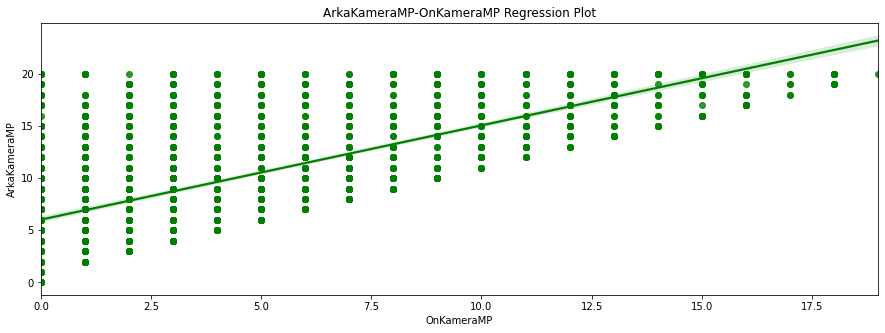

In [37]:
plt.figure(figsize=(15,5))
sns.regplot(x=dfMain.OnKameraMP, y=dfMain.ArkaKameraMP, color="g")
plt.title("ArkaKameraMP-OnKameraMP Regression Plot")
plt.show()

Görüldüğü gibi Ön Kamera MP ile Arka Kamera MP arasında pozitf bir ilişki vardır

In [38]:
ikisideYok=dfMain[(dfMain['3G']==0)&(dfMain['4G']==0)].shape[0]
BiriVar=dfMain[(dfMain['3G']==0)&(dfMain['4G']==1)].shape[0]+dfMain[(dfMain['3G']==1)&(dfMain['4G']==0)].shape[0]
ikisideVar=dfMain[(dfMain['3G']==1)&(dfMain['4G']==1)].shape[0]
listeVarYok=[ikisideYok,BiriVar,ikisideVar]
labels=['3G ve 4G yok','3G ve 4G den biri var','3G ve 4G de bulunanlar']
trace1={
    "values":listeVarYok,
    "labels":labels,
    "name":"3G ve 4G Bulundurma Durumu",
    "hoverinfo":"label+percent+name",
    "hole":.3,#ortada boşluk bırakıt
    "type":"pie"
}
data=[trace1];
layout={
    "title":"3G ve 4G Bulundurma Durumu",
    "annotations":[
        {"font":{"size":20},
        "showarrow":False,
        "text":"",
        "x":0.20,
        "y":1
        },
    ]
};
fig=go.Figure(data=data,layout=layout)
iplot(fig)

Bu grafikten yararlanarak 3G nin ve 4G nin beraber bulunduğu gözlemlerin çoğunlukta olduğunu söyleyebiliriz. Bu da koreleasyonlarının yüksek olmasını sağlamaktadır.

Veri setimizin üzerinde makine öğrenmesine başlamadan önce ön adımları gerçekleştirelim.

Bağımlı ve bağımsız değişkenleri bölütleyelim.

In [39]:
y = df['FiyatAraligi']
x = df.drop(['FiyatAraligi'], axis=1)

Bağımlı değişkenimizi görüntüleyelim.

In [40]:
y

0         Normal
1         Pahalı
2           Ucuz
3         Pahalı
4         Normal
          ...   
1995    Çok Ucuz
1996        Ucuz
1997      Pahalı
1998      Normal
1999      Normal
Name: FiyatAraligi, Length: 2000, dtype: object

Bağımlı değişkenlerimizin dağılımını inceleyelim.

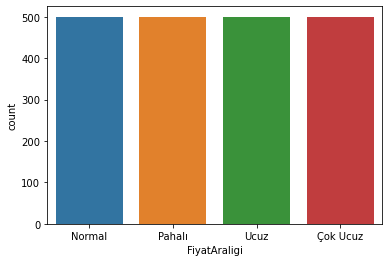

In [41]:
sns.countplot(x="FiyatAraligi", data=df)
plt.show()

Görüldüğü üzere bağımlı değişkenimiz veri setine eşit bir şekilde dağılmıştır.

Bağımsız değişkenimizi görüntüleyelim.

In [42]:
x

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru,3G,Dokunmatik,WiFi
0,1325,0,1.9,0,2.0,0,50,0.1,146,1,10,499,695,2328.0,2,1,0,0
1,1046,1,2.8,1,0.0,1,58,0.2,100,8,0,259,1040,3863.0,9,1,1,1
2,843,0,1.3,1,1.0,0,16,0.9,119,7,4,593,732,1734.0,14,0,0,1
3,894,0,0.5,1,1.0,1,50,0.5,199,3,14,1285,1462,3615.0,6,1,0,1
4,936,0,1.0,0,1.0,0,18,0.2,153,3,18,1330,1686,2391.0,3,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,689,0,2.9,1,3.0,1,7,0.8,147,2,6,487,722,1241.0,16,1,0,0
1996,1654,0,1.8,0,1.0,0,11,0.3,146,7,2,1184,1719,1070.0,14,1,1,1
1997,742,0,2.2,1,4.0,0,56,0.2,190,7,14,577,1359,3557.0,12,0,1,1
1998,704,0,2.2,1,4.0,0,53,0.2,186,6,6,251,1013,3653.0,15,1,1,1


Bağımlı ve bağımsız değişkenler üzerinden eğitim ve test olmak üzere bölütleme yapalım. Test oranını 25% belirleyelim.

In [43]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

x_train'i görüntüleyelim.

In [44]:
x_train

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru,3G,Dokunmatik,WiFi
1738,867,0,1.4,1,0.0,1,4,0.7,135,6,1,70,1974,790.0,3,1,1,0
548,1404,0,2.1,0,16.0,0,44,0.9,151,1,20,1703,1880,1196.0,5,0,0,1
936,683,1,2.1,0,7.0,0,30,0.1,197,7,8,927,1135,2066.0,15,0,0,0
1389,1109,1,2.8,1,6.0,0,57,0.9,151,1,12,124,833,2785.0,16,1,0,0
1607,1395,0,1.8,1,0.0,0,23,0.1,111,3,1,213,705,2571.0,13,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,605,0,1.0,0,8.0,1,9,0.1,142,3,16,160,1026,392.0,4,1,0,0
1294,1149,1,2.2,0,4.0,0,30,0.2,106,6,5,1617,1675,3755.0,8,1,0,0
860,534,0,0.5,1,4.0,0,2,0.2,85,5,16,911,1220,2466.0,18,0,1,1
1459,1720,0,1.6,0,18.0,1,2,0.8,188,5,20,334,896,2522.0,2,1,0,1


x_test'i görüntüleyelim.

In [45]:
x_test

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru,3G,Dokunmatik,WiFi
1860,1433,1,2.3,0,2.0,1,5,0.1,129,5,11,420,784,2132.0,19,1,0,1
353,1174,1,0.9,0,7.0,0,30,1.0,147,4,20,744,1244,804.0,16,0,1,1
1333,999,0,2.6,1,11.0,1,56,1.0,165,4,13,342,1641,3083.0,11,1,1,1
905,972,1,0.5,1,5.0,0,13,0.4,193,5,8,1392,1795,1615.0,13,0,1,0
1289,1811,1,2.5,0,4.0,1,5,0.6,98,4,16,447,568,2700.0,8,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
765,1530,0,2.0,0,11.0,0,42,0.8,177,6,13,454,1975,725.0,19,0,0,1
1356,668,0,2.3,0,2.0,1,48,0.3,114,1,19,195,1292,1201.0,4,1,1,0
408,1179,1,0.8,0,1.0,0,5,0.9,154,5,17,913,1429,543.0,18,0,0,1
1614,1456,0,1.6,1,9.0,1,39,0.1,80,8,10,815,1666,3998.0,13,1,1,0


y_train'i görüntüleyelim.

In [46]:
y_train

1738    Çok Ucuz
548         Ucuz
936         Ucuz
1389      Normal
1607      Normal
          ...   
1130    Çok Ucuz
1294      Pahalı
860       Normal
1459      Normal
1126        Ucuz
Name: FiyatAraligi, Length: 1500, dtype: object

y_test'i görüntüleyelim.;

In [47]:
y_test

1860        Ucuz
353     Çok Ucuz
1333      Normal
905         Ucuz
1289      Normal
          ...   
765     Çok Ucuz
1356    Çok Ucuz
408     Çok Ucuz
1614      Pahalı
694       Normal
Name: FiyatAraligi, Length: 500, dtype: object

Fiyat Aralığını en doğru şekilde tahmin edebilmek için en başarılı classification algoritmasının hangisi olduğuna bulalım.

# Naive Bayes Classification

Naive Bayes için kullanacağımız kütüphaneyi import edelim ve modelimizi inşa edelim.

In [48]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)

GaussianNB()

x_test de bulunun tüm gözlemleri tahmin edip y_pred değişkenine atayalım.

In [49]:
y_pred = nb.predict(x_test)

Accuracy değerine bakalım.

In [50]:
accuracy_score(y_test, y_pred)

0.812

Modeli farklı gözlemlerle kombinleyerek tekrardan skorunu hesaplayalım ve ortalamalarını alalım.

In [51]:
cross_val_score(nb, x_test, y_test, cv = 10).mean()

0.8019999999999999

Yaklaşık olarak %80 doğruluk başarısı elde ediyoruz. Karmaşıklık matrisini çizdirerek ineleyelim.

In [52]:
karmasiklik_matrisi = confusion_matrix(y_test, y_pred)
print(karmasiklik_matrisi)

[[ 93  15  23   0]
 [ 12 100   1   0]
 [ 22   0  96   9]
 [  0   0  12 117]]


Karmaşıklık matrisini incelediğimizde gözlemlerin 406 tanesini doğru,94 tanesini ise yanlış tahmin ettiğini söyleyebiliriz.

Sınıflandırma raporuna bakalım.

In [53]:
report=classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

      Normal       0.73      0.71      0.72       131
      Pahalı       0.87      0.88      0.88       113
        Ucuz       0.73      0.76      0.74       127
    Çok Ucuz       0.93      0.91      0.92       129

    accuracy                           0.81       500
   macro avg       0.81      0.81      0.81       500
weighted avg       0.81      0.81      0.81       500



Modelin daha iyi accuracy score vermesi için feature selection yapalım.

In [54]:
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

Tüm öznitelikleri ve skorlarını görüntüleyelim.

In [55]:
test = SelectKBest(k = 11)
fit = test.fit(x, y)
for indis, skor in enumerate(fit.scores_):
    print(skor, " -> ", x.columns[indis])

31.59815753989697  ->  BataryaGucu
0.4767677091173118  ->  Bluetooth
0.49370780102890643  ->  MikroislemciHizi
0.42823928557591956  ->  CiftHat
0.7411207606610439  ->  OnKameraMP
1.0595245262724162  ->  4G
2.9229960794178416  ->  DahiliBellek
1.5006824396689178  ->  Kalinlik
3.5943181851549952  ->  Agirlik
2.6254151540861677  ->  CekirdekSayisi
0.8254463576889531  ->  ArkaKameraMP
19.484841776704883  ->  CozunurlukYükseklik
22.620882490611052  ->  CozunurlukGenislik
3548.148899325306  ->  RAM
1.6288113087357383  ->  BataryaOmru
0.4573197497059122  ->  3G
1.2933022318768916  ->  Dokunmatik
0.2849404695197208  ->  WiFi


Doğruluk skorunu yükseltmek istiyoruz, bu yüzden sadece en anlamlı olan öznitelikleri seçelim ve tekrardan model kurup eğitelim.

In [56]:
y1 = df['FiyatAraligi']
x1 = df[["BataryaGucu", "4G", "DahiliBellek", "Kalinlik", "Agirlik", "CekirdekSayisi", "CozunurlukYükseklik","CozunurlukGenislik","RAM","Dokunmatik"]]

In [57]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1,
                                                    y1, 
                                                    test_size = 0.25, 
                                                    random_state = 42)

In [58]:
nb = GaussianNB()
nb.fit(x1_train, y1_train)
y1_pred = nb.predict(x1_test)
accuracy_score(y1_test, y1_pred)

0.826

Sınıflandırma raporuna tekrardan bakalım.

In [59]:
reportNB=classification_report(y1_test, y1_pred)
print(reportNB)

              precision    recall  f1-score   support

      Normal       0.75      0.75      0.75       131
      Pahalı       0.88      0.88      0.88       113
        Ucuz       0.75      0.77      0.76       127
    Çok Ucuz       0.94      0.91      0.92       129

    accuracy                           0.83       500
   macro avg       0.83      0.83      0.83       500
weighted avg       0.83      0.83      0.83       500



In [60]:
cross_val_score(nb, x1_test, y1_test, cv = 10).mean()

0.8100000000000002

Feature selection yaparak accuracy score değerini yükselttik. değişimi classification report değerlerine bakarak da görebiliriz.

Navie Bayes Metodunu kullanarak %81 doğruluğunda bir başarı elde ettik.

# Desicion Tree Classifier

Descion Tree algoritmasında kullanacağımız kütüphaneyi import edelim ve modelimizi inşa edelim.

In [61]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state = 42, criterion='gini')
dtEntropy = DecisionTreeClassifier(random_state = 42, criterion='entropy')
dt_model = dt.fit(x_train, y_train)

Şimdilik parametre optimizasyonu yapmadan modeli eğitmiş olalım ve modelin karar ağacını görüntüleyelim

Karar Ağacını görüntüleyelim.

In [62]:
from sklearn.tree.export import export_text
r = export_text(dt, feature_names = ['BataryaGucu', 'Bluetooth', 'MikroislemciHizi', 'CiftHat', 'OnKameraMP',
       '4G', 'DahiliBellek', 'Kalinlik', 'Agirlik', 'CekirdekSayisi',
       'ArkaKameraMP', 'CozunurlukYükseklik', 'CozunurlukGenislik', 'RAM',
       'BataryaOmru', '3G', 'Dokunmatik', 'WiFi'])

print(r)

|--- RAM <= 2217.50
|   |--- RAM <= 1082.50
|   |   |--- CozunurlukYükseklik <= 1233.00
|   |   |   |--- BataryaGucu <= 1816.50
|   |   |   |   |--- RAM <= 1024.00
|   |   |   |   |   |--- CozunurlukGenislik <= 1893.50
|   |   |   |   |   |   |--- BataryaOmru <= 2.50
|   |   |   |   |   |   |   |--- DahiliBellek <= 9.00
|   |   |   |   |   |   |   |   |--- class: Ucuz
|   |   |   |   |   |   |   |--- DahiliBellek >  9.00
|   |   |   |   |   |   |   |   |--- class: Çok Ucuz
|   |   |   |   |   |   |--- BataryaOmru >  2.50
|   |   |   |   |   |   |   |--- class: Çok Ucuz
|   |   |   |   |   |--- CozunurlukGenislik >  1893.50
|   |   |   |   |   |   |--- Agirlik <= 96.50
|   |   |   |   |   |   |   |--- class: Ucuz
|   |   |   |   |   |   |--- Agirlik >  96.50
|   |   |   |   |   |   |   |--- class: Çok Ucuz
|   |   |   |   |--- RAM >  1024.00
|   |   |   |   |   |--- CozunurlukYükseklik <= 918.50
|   |   |   |   |   |   |--- class: Çok Ucuz
|   |   |   |   |   |--- CozunurlukYükseklik > 

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning:

The sklearn.tree.export module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.tree. Anything that cannot be imported from sklearn.tree is now part of the private API.



Karar ağacını graphviz ile görselleştirelim.

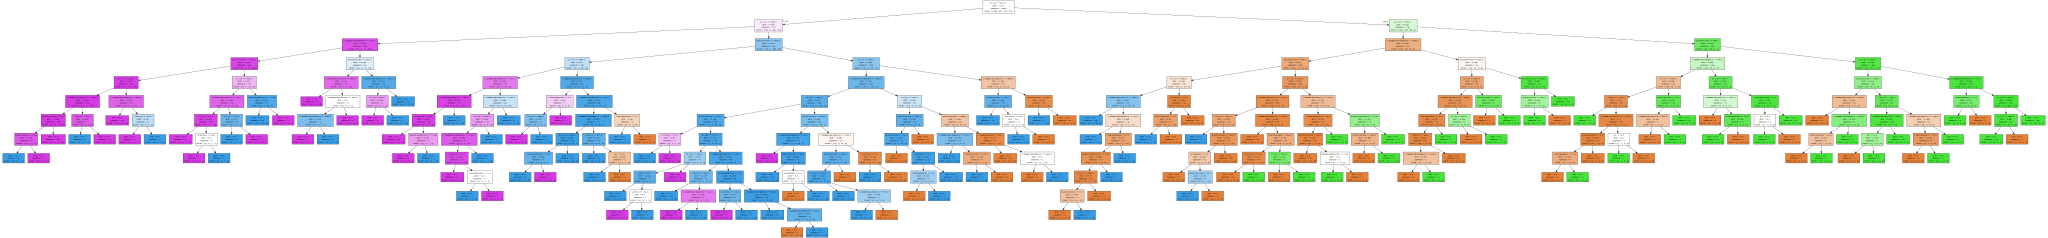

In [63]:
from sklearn.tree import export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

graph = Source(tree.export_graphviz(dt, out_file = None, feature_names = x.columns, filled = True))
display(SVG(graph.pipe(format = 'svg')))

x_test gözlemlerini tahmin ettirelim ve y_pred'e atayalım. Doğruluk skorumuzu öğrenelim.

In [64]:
y_pred = dt.predict(x_test)
accuracy_score(y_test, y_pred)

0.818

Karmaşıklık matrisini görüntüleyelim

In [65]:
karmasiklik_matrisi = confusion_matrix(y_test, y_pred)
print(karmasiklik_matrisi)

[[ 96  19  16   0]
 [ 13 100   0   0]
 [ 13   0  99  15]
 [  0   0  15 114]]


Karmasiklik matrisini incelediğimizde 399 doğru, 91 yanlış tahmin olduğunu söyleyebiliriz.

Modeli farklı gözlemlerle kombinleyerek tekrardan skorunu hesaplayalım.

In [66]:
cross_val_score(dt_model, x, y, cv = 10).mean()

0.8314999999999999

Sınıflandırma raporuna bakalım.

In [67]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Normal       0.79      0.73      0.76       131
      Pahalı       0.84      0.88      0.86       113
        Ucuz       0.76      0.78      0.77       127
    Çok Ucuz       0.88      0.88      0.88       129

    accuracy                           0.82       500
   macro avg       0.82      0.82      0.82       500
weighted avg       0.82      0.82      0.82       500



%83,15 oranında doğruluk elde ettik. Doğruluk değerimizi arttırmak için feature selection uyguladığımız x1 ve y1 den yararlanarak accuracy score değerimizi görüntüleyelim.

In [68]:
cross_val_score(dt_model, x1, y1, cv = 10).mean()

0.8355

Desicion Tree modeli ile %83,5 Doğruluğuna ulaştık.

Desicion Tree modelimizi entropy paremetresini kullanarak tekrar uygulayalım ve sonuçları inceleyelim.

In [69]:
clf_entropy = DecisionTreeClassifier( 
            criterion = "entropy", random_state = 100, 
            max_depth = 3, min_samples_leaf = 5) 
clf_entropy.fit(x1_train, y1_train) 

cross_val_score(dtEntropy, x1, y1, cv = 10).mean()



0.866

In [70]:
reportDT=classification_report(y1_test, y1_pred)
print(reportDT)

              precision    recall  f1-score   support

      Normal       0.75      0.75      0.75       131
      Pahalı       0.88      0.88      0.88       113
        Ucuz       0.75      0.77      0.76       127
    Çok Ucuz       0.94      0.91      0.92       129

    accuracy                           0.83       500
   macro avg       0.83      0.83      0.83       500
weighted avg       0.83      0.83      0.83       500



Entropy paremetresini kullanarak daha iyi sonuç aldık.

### Random Forest

Random Forest Classification kullanarak Desicion Tree modelimizi geliştirelim ve en uygun tree sayısını bulalım.

In [71]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=400,random_state=1,criterion = "entropy")
rf.fit(x1_train,y1_train)
rf.score(x1_test,y1_test)
y1_pred = rf.predict(x1_test)
cross_val_score(rf, x1, y1, cv = 10).mean()

0.9125

In [72]:
reportRF=classification_report(y1_test, y1_pred)
print(reportRF)

              precision    recall  f1-score   support

      Normal       0.90      0.85      0.88       131
      Pahalı       0.92      0.95      0.93       113
        Ucuz       0.88      0.90      0.89       127
    Çok Ucuz       0.95      0.96      0.95       129

    accuracy                           0.91       500
   macro avg       0.91      0.92      0.91       500
weighted avg       0.91      0.91      0.91       500



Random Tree Classification kullandığımızda %91,25 Doğruluk elde ettik.

# Knn Classification

Kütüphanelerimizi import edelim.

In [73]:
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.neighbors import KNeighborsClassifier

Knn cllassification uygulayıp scorunu ekrana yazdıralım.

In [74]:
knn= KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train,y_train)
prediction=knn.predict(x_test)
knn.score(x_test,y_test)

0.912

In [75]:
cross_val_score(knn, x, y, cv = 10).mean()

0.914

En iyi n_neighbours değerini bulalım.

In [76]:
knn_params = {"n_neighbors": np.arange(1,15)}

In [77]:
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, knn_params, cv = 3)
knn_cv.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [78]:
print("En iyi skor: " + str(knn_cv.best_score_))
print("En iyi parametreler: " + str(knn_cv.best_params_))

En iyi skor: 0.934
En iyi parametreler: {'n_neighbors': 9}


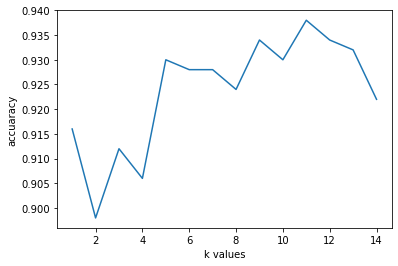

In [79]:
score_list=[]
for each in range(1,15):
    knn2=KNeighborsClassifier(n_neighbors=each)
    knn2.fit(x_train,y_train)
    score_list.append(knn2.score(x_test,y_test))

plt.plot(range(1,15),score_list)
plt.xlabel("k values")
plt.ylabel("accuaracy")
plt.show()

En iyi n_neighbours paremetresini gözlemlemek için grafik çizdirelim

In [80]:
knn= KNeighborsClassifier(n_neighbors = 11) # n_neighbors = K
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
knn.score(x_test,y_test)

0.938

In [81]:
cross_val_score(knn, x, y, cv = 10).mean()

0.9315

Karmaşıklık matrisini görüntüleyelim.

In [82]:
karmasiklik_matrisi = confusion_matrix(y_test, y_pred)
print(karmasiklik_matrisi)

[[116   7   8   0]
 [  2 111   0   0]
 [  5   0 116   6]
 [  0   0   3 126]]


Karmasiklik matrisini incelediğimizde 496 doğru, 31 yanlış tahmin olduğunu söyleyebiliriz.

In [83]:
reportKNN=classification_report(y_test, y_pred)
print(reportKNN)

              precision    recall  f1-score   support

      Normal       0.94      0.89      0.91       131
      Pahalı       0.94      0.98      0.96       113
        Ucuz       0.91      0.91      0.91       127
    Çok Ucuz       0.95      0.98      0.97       129

    accuracy                           0.94       500
   macro avg       0.94      0.94      0.94       500
weighted avg       0.94      0.94      0.94       500



Knn Algoritması ile 0,9315  oranında bir doğruluk bulduk.

### Sonuç

Tüm algoritmaların sonuçlarını sırasıyla inceleyelim; 

Naive Bayes kullanarak 0.81, Desicion Tree kullanarak 0.866, Random Forest kullanarak 0.9125, Knn kullanarak ise 0.9315 oranlarında doğruluk sonuçları aldık. 

Classification report değerlerine bakarak bizim için en iyi algoritmanın hangisi olduğuna karar verelim.

In [84]:
print(reportNB)

              precision    recall  f1-score   support

      Normal       0.75      0.75      0.75       131
      Pahalı       0.88      0.88      0.88       113
        Ucuz       0.75      0.77      0.76       127
    Çok Ucuz       0.94      0.91      0.92       129

    accuracy                           0.83       500
   macro avg       0.83      0.83      0.83       500
weighted avg       0.83      0.83      0.83       500



In [85]:
print(reportDT)

              precision    recall  f1-score   support

      Normal       0.75      0.75      0.75       131
      Pahalı       0.88      0.88      0.88       113
        Ucuz       0.75      0.77      0.76       127
    Çok Ucuz       0.94      0.91      0.92       129

    accuracy                           0.83       500
   macro avg       0.83      0.83      0.83       500
weighted avg       0.83      0.83      0.83       500



In [86]:
print(reportRF)

              precision    recall  f1-score   support

      Normal       0.90      0.85      0.88       131
      Pahalı       0.92      0.95      0.93       113
        Ucuz       0.88      0.90      0.89       127
    Çok Ucuz       0.95      0.96      0.95       129

    accuracy                           0.91       500
   macro avg       0.91      0.92      0.91       500
weighted avg       0.91      0.91      0.91       500



In [87]:
print(reportKNN)

              precision    recall  f1-score   support

      Normal       0.94      0.89      0.91       131
      Pahalı       0.94      0.98      0.96       113
        Ucuz       0.91      0.91      0.91       127
    Çok Ucuz       0.95      0.98      0.97       129

    accuracy                           0.94       500
   macro avg       0.94      0.94      0.94       500
weighted avg       0.94      0.94      0.94       500



Classification Report değerlerini incelediğimizde en iyi sonucu knn classification algoritmasının verdiğini söyleyebiliriz. Bu nedenle bizim için en uygun yöntem Knn Classsification olacaktır.